<a href="https://colab.research.google.com/github/pranathi0726/python-project/blob/main/pythonproject1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Accuracy: 98.00%
Precision: 98.01%

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.96      0.97        50
           1       0.98      0.98      0.98        50
           2       1.00      1.00      1.00        50
           3       0.96      0.98      0.97        50

    accuracy                           0.98       200
   macro avg       0.98      0.98      0.98       200
weighted avg       0.98      0.98      0.98       200



/tmp/ipython-input-616405960.py:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances, y=features, palette='viridis')


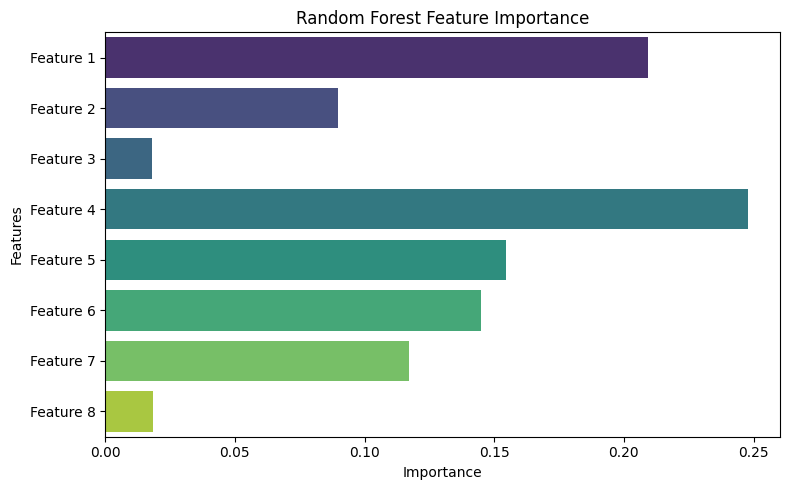

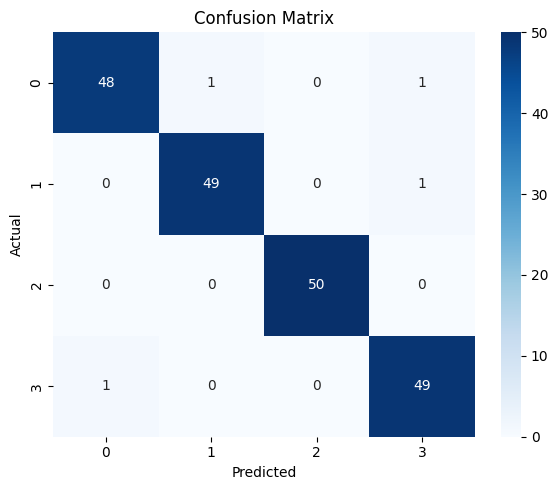

/tmp/ipython-input-616405960.py:65: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=unique, y=counts, palette='magma')


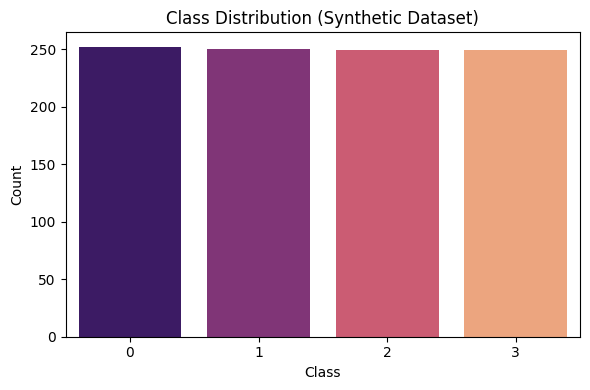

In [1]:
# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.metrics import (
    accuracy_score, precision_score, classification_report,
    confusion_matrix
)

# 1. Generate synthetic dataset
X, y = make_classification(
    n_samples=1000, n_features=8, n_informative=6,
    n_redundant=0, n_classes=4, class_sep=2.5, random_state=42
)

# 2. Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# 3. Train Random Forest model
rf = RandomForestClassifier(n_estimators=300, random_state=42)
rf.fit(X_train, y_train)

# 4. Evaluate model
y_pred = rf.predict(X_test)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred, average='weighted')

print(f"Accuracy: {acc*100:.2f}%")
print(f"Precision: {prec*100:.2f}%")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# 5. Plot 1: Feature Importance
importances = rf.feature_importances_
features = [f"Feature {i+1}" for i in range(X.shape[1])]

plt.figure(figsize=(8, 5))
sns.barplot(x=importances, y=features, palette='viridis')
plt.title("Random Forest Feature Importance")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.tight_layout()
plt.savefig("feature_importance.png", dpi=300)
plt.show()

# 6. Plot 2: Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.savefig("confusion_matrix.png", dpi=300)
plt.show()

# 7. Plot 3: Class Distribution
unique, counts = np.unique(y, return_counts=True)
plt.figure(figsize=(6, 4))
sns.barplot(x=unique, y=counts, palette='magma')
plt.title("Class Distribution (Synthetic Dataset)")
plt.xlabel("Class")
plt.ylabel("Count")
plt.tight_layout()
plt.savefig("class_distribution.png", dpi=300)
plt.show()